In [3]:
import os
import zipfile
from google.colab import files

In [5]:
upload = files.upload()

Saving face.zip to face.zip


In [6]:
zip_ref = zipfile.ZipFile("./face.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [7]:
base_dir = 'tmp/face.zip'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Testing')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
TrainingImagePath='/content/tmp/face/Training'
TestingImagePath='/content/tmp/face/Testing'

In [10]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [11]:
test_datagen = ImageDataGenerator()

In [12]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 

Found 107 images belonging to 7 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 49 images belonging to 7 classes.


In [15]:

# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

In [16]:
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 

In [17]:
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

In [18]:
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

Mapping of Face and its ID {0: 'face1', 1: 'face2', 2: 'face3', 3: 'face4', 4: 'face5', 5: 'face6', 6: 'face7'}


In [19]:
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  7


In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
 

In [21]:

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

In [22]:
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
 
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

In [23]:
# ADDITIONAL LAYER of CONVOLUTION for better accuracy
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))
 

In [24]:
# STEP--3 FLattening
classifier.add(Flatten())
 
# STEP--4 Fully Connected Neural Network
classifier.add(Dense(64, activation='relu'))
 
classifier.add(Dense(OutputNeurons, activation='softmax'))

In [25]:
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [27]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

In [58]:

# Starting the model training
classifier.fit_generator(
                    training_set,
                    steps_per_epoch=2,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=2)


Epoch 1/10


<ipython-input-58-8088ec63cf5c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


2/2 [==============================] - 1s 884ms/step - loss: 0.1943 - accuracy: 0.9767 - val_loss: 0.0929 - val_accuracy: 0.9592
Epoch 2/10
2/2 [==============================] - 1s 785ms/step - loss: 0.1428 - accuracy: 0.9531 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 398ms/step - loss: 0.0315 - accuracy: 0.9767 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 427ms/step - loss: 0.0498 - accuracy: 0.9535 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 326ms/step - loss: 0.0872 - accuracy: 0.9688 - val_loss: 0.1131 - val_accuracy: 0.9388
Epoch 6/10
2/2 [==============================] - 1s 295ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9388
Epoch 7/10
2/2 [==============================] - 1s 350ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.1509 - val_accuracy: 0.9388
Epoch 8/10
2/2 [===============

In [63]:

'''########### Making single predictions ###########'''
import numpy as np
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img,img_to_array
 
ImagePath = "/content/tmp/face/Testing/face1/image_0005_Face_1.jpg"
test_image=load_img(ImagePath,target_size=(64, 64))
test_image=img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  face1


In [61]:
upload = files.upload()

Saving mahesh.jpeg to mahesh.jpeg


Epoch 1/10
2/2 [==============================] - 1s 773ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 371ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 329ms/step - loss: 0.0333 - accuracy: 0.9844 - val_loss: 6.8044e-04 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 372ms/step - loss: 0.0606 - accuracy: 0.9844 - val_loss: 5.1115e-04 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 403ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 286ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 3.5280e-04 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 309ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/

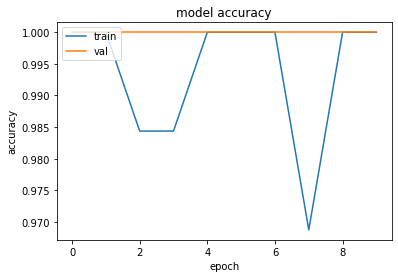

In [60]:
import keras
from matplotlib import pyplot as plt
history = classifier.fit( training_set,
                    steps_per_epoch=2,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()